<br>

# Layers

Uma vez criada uma sequencia de códigos, foi possível definir uma funão que integra todos eles, apresentada abaixo:

In [1]:
from get_data_datageo import *

<br>

## Sedes Municipais

Página com metadados: http://datageo.ambiente.sp.gov.br/geoportal/catalog/search/resource/details.page?uuid={64BF344A-3AD0-410A-A3AA-DFE01C4E9BBB}
Resposta da página foi <Response [200]>
> Encontrei o shapefile
Link: http://datageo.ambiente.sp.gov.br/geoserver/datageo/SedesMunicipais/wfs?version=1.0.0&request=GetFeature&outputFormat=SHAPE-ZIP&typeName=SedesMunicipais
Encontrei 1 arquivos ".shp", sendo que o primeiro deles é o "SedesMunicipaisPoint.shp"
   Codigo_CET                        Nome                     geometry
0         730                      Rosana  POINT (-53.05578 -22.57789)
1         725  Euclides da Cunha Paulista  POINT (-52.59680 -22.55792)
2         690             Teodoro Sampaio  POINT (-52.16922 -22.53031)
3         561         Presidente Epitácio  POINT (-52.10945 -21.76577)
4         435             Marabá Paulista  POINT (-51.96234 -22.10382)
epsg:4674
epsg:4326
nome_municipio      object
geometry          geometry
dtype: object


,nome_municipio,geometry
0,Rosana,POINT (-53.05578 -22.57789)
1,Euclides da Cunha Paulista,POINT (-52.59680 -22.55792)
2,Teodoro Sampaio,POINT (-52.16922 -22.53031)
3,Presidente Epitácio,POINT (-52.10945 -21.76577)
4,Marabá Paulista,POINT (-51.96234 -22.10382)


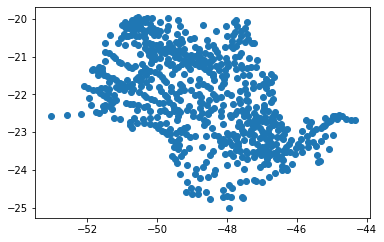

In [2]:
# Input dos caminhos para os metadados
url = 'http://datageo.ambiente.sp.gov.br/geoportal/catalog/search/resource/details.page?uuid='
id_metadados = '{64BF344A-3AD0-410A-A3AA-DFE01C4E9BBB}'

# URL
url_meta = '{}{}'.format(url, id_metadados)

# Download
gdf = download_datageo_shp(url_meta)

# Renomeia Colunas
gdf = gdf.rename(
    columns={
        'Nome': 'nome_municipio'
    }
)

# Deleta Colunas
gdf = gdf.drop(['Codigo_CET'], axis=1)

# Results
print(gdf.dtypes)
display(gdf.head(5))

# Salva
gdf.to_file(os.path.join('data', 'sedes_municipais.geojson'), driver='GeoJSON', encoding='utf-8')
gdf.to_file(os.path.join('data', 'sedes_municipais.gpkg'), layer='Sedes', driver='GPKG')

<br>

## Limite Municipal

Página com metadados: http://datageo.ambiente.sp.gov.br/geoportal/catalog/search/resource/details.page?uuid={74040682-561A-40B8-BB2F-E188B58088C1}
Resposta da página foi <Response [200]>
> Encontrei o shapefile
Link: http://datageo.ambiente.sp.gov.br/geoserver/datageo/LimiteMunicipal/wfs?version=1.0.0&request=GetFeature&outputFormat=SHAPE-ZIP&typeName=LimiteMunicipal
Encontrei 1 arquivos ".shp", sendo que o primeiro deles é o "LimiteMunicipalPolygon.shp"
   Cod_Cetesb  Cod_ibge              Nome            Rotulo  UGRHI  \
0         150   3500105        Adamantina        Adamantina     21   
1         151   3500204            Adolfo            Adolfo     16   
2         152   3500303             Aguai             Aguaí      9   
3         154   3500402    Aguas da Prata    Águas da Prata      9   
4         153   3500501  Aguas de Lindoia  Águas de Lindóia      9   

      Nome_ugrhi                                           geometry  
0          PEIXE  POLYGON ((-51.17735 -21.69213, -

,id_ibge,nome_municipio,rotulo_municipio,geometry
0,3500105,Adamantina,Adamantina,"POLYGON ((-51.17735 -21.69213, -51.17716 -21.6..."
1,3500204,Adolfo,Adolfo,"POLYGON ((-49.74715 -21.29637, -49.74682 -21.2..."
2,3500303,Aguai,Aguaí,"POLYGON ((-47.23298 -22.05409, -47.23289 -22.0..."
3,3500402,Aguas da Prata,Águas da Prata,"POLYGON ((-46.75758 -21.84763, -46.75750 -21.8..."
4,3500501,Aguas de Lindoia,Águas de Lindóia,"POLYGON ((-46.66020 -22.47948, -46.66018 -22.4..."


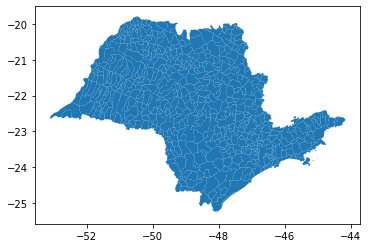

In [3]:
# Input dos caminhos para os metadados
url = 'http://datageo.ambiente.sp.gov.br/geoportal/catalog/search/resource/details.page?uuid='
id_metadados = '{74040682-561A-40B8-BB2F-E188B58088C1}'

# URL
url_meta = '{}{}'.format(url, id_metadados)

# Download
gdf = download_datageo_shp(url_meta)

# Renomeia Colunas
gdf = gdf.rename(
    columns={
        'Cod_ibge':'id_ibge',
        'Nome':'nome_municipio',
        'Rotulo':'rotulo_municipio'
    }
)

# Deleta Colunas
gdf = gdf.drop(['Cod_Cetesb', 'UGRHI', 'Nome_ugrhi'], axis=1)

# Results
print(gdf.dtypes)
display(gdf.head(5))

# Salva
gdf.to_file(os.path.join('data', 'limite_municipal.geojson'), driver='GeoJSON', encoding='utf-8')
gdf.to_file(os.path.join('data', 'limite_municipal.gpkg'), layer='Limite', driver='GPKG')